# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.utils import shuffle


# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
map_names = lambda x: signnames[x]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

class 0 Speed limit (20km/h)                                180 samples


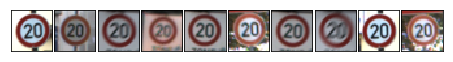

--------------------------------------------------------------------------------------

class 1 Speed limit (30km/h)                                1980 samples


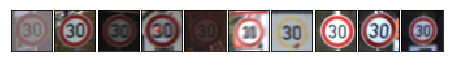

--------------------------------------------------------------------------------------

class 2 Speed limit (50km/h)                                2010 samples


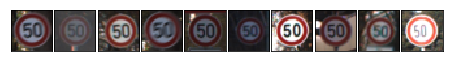

--------------------------------------------------------------------------------------

class 3 Speed limit (60km/h)                                1260 samples


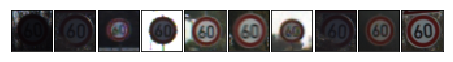

--------------------------------------------------------------------------------------

class 4 Speed limit (70km/h)                                1770 samples


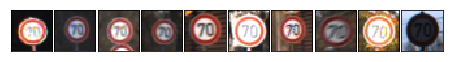

--------------------------------------------------------------------------------------

class 5 Speed limit (80km/h)                                1650 samples


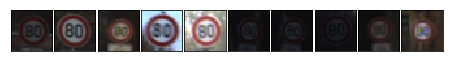

--------------------------------------------------------------------------------------

class 6 End of speed limit (80km/h)                         360 samples


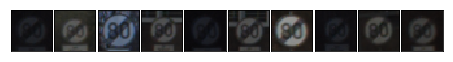

--------------------------------------------------------------------------------------

class 7 Speed limit (100km/h)                               1290 samples


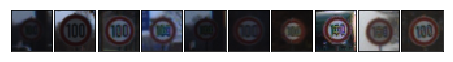

--------------------------------------------------------------------------------------

class 8 Speed limit (120km/h)                               1260 samples


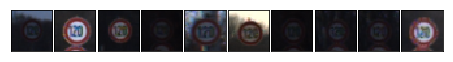

--------------------------------------------------------------------------------------

class 9 No passing                                          1320 samples


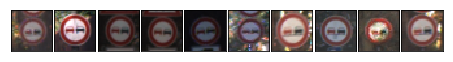

--------------------------------------------------------------------------------------

class 10 No passing for vehicles over 3.5 metric tons        1800 samples


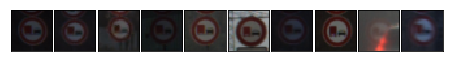

--------------------------------------------------------------------------------------

class 11 Right-of-way at the next intersection               1170 samples


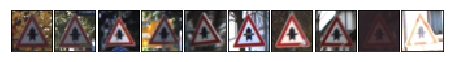

--------------------------------------------------------------------------------------

class 12 Priority road                                       1890 samples


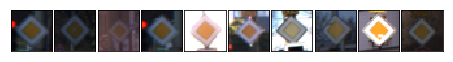

--------------------------------------------------------------------------------------

class 13 Yield                                               1920 samples


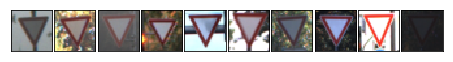

--------------------------------------------------------------------------------------

class 14 Stop                                                690 samples


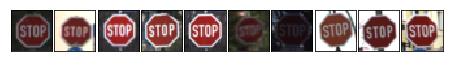

--------------------------------------------------------------------------------------

class 15 No vehicles                                         540 samples


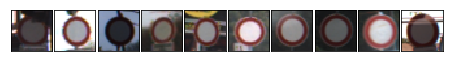

--------------------------------------------------------------------------------------

class 16 Vehicles over 3.5 metric tons prohibited            360 samples


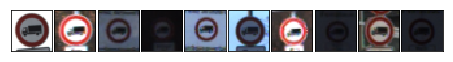

--------------------------------------------------------------------------------------

class 17 No entry                                            990 samples


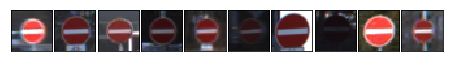

--------------------------------------------------------------------------------------

class 18 General caution                                     1080 samples


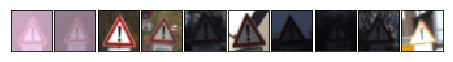

--------------------------------------------------------------------------------------

class 19 Dangerous curve to the left                         180 samples


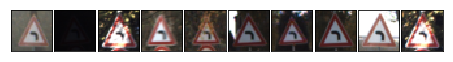

--------------------------------------------------------------------------------------

class 20 Dangerous curve to the right                        300 samples


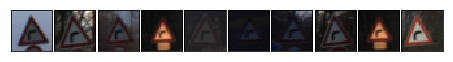

--------------------------------------------------------------------------------------

class 21 Double curve                                        270 samples


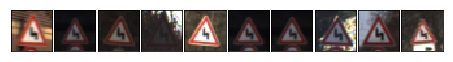

--------------------------------------------------------------------------------------

class 22 Bumpy road                                          330 samples


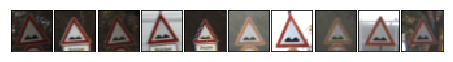

--------------------------------------------------------------------------------------

class 23 Slippery road                                       450 samples


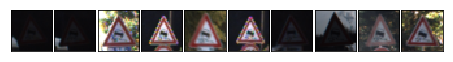

--------------------------------------------------------------------------------------

class 24 Road narrows on the right                           240 samples


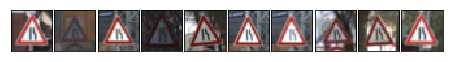

--------------------------------------------------------------------------------------

class 25 Road work                                           1350 samples


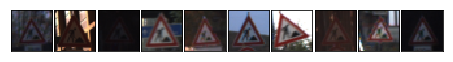

--------------------------------------------------------------------------------------

class 26 Traffic signals                                     540 samples


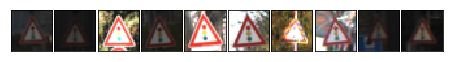

--------------------------------------------------------------------------------------

class 27 Pedestrians                                         210 samples


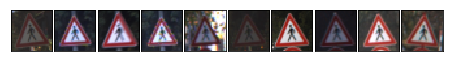

--------------------------------------------------------------------------------------

class 28 Children crossing                                   480 samples


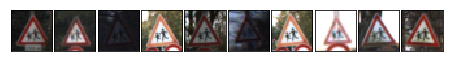

--------------------------------------------------------------------------------------

class 29 Bicycles crossing                                   240 samples


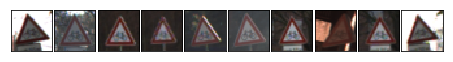

--------------------------------------------------------------------------------------

class 30 Beware of ice/snow                                  390 samples


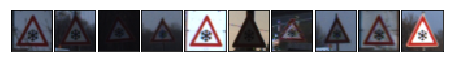

--------------------------------------------------------------------------------------

class 31 Wild animals crossing                               690 samples


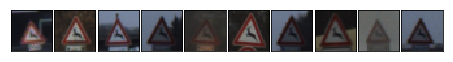

--------------------------------------------------------------------------------------

class 32 End of all speed and passing limits                 210 samples


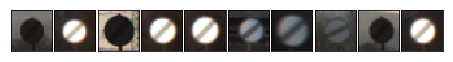

--------------------------------------------------------------------------------------

class 33 Turn right ahead                                    599 samples


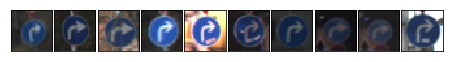

--------------------------------------------------------------------------------------

class 34 Turn left ahead                                     360 samples


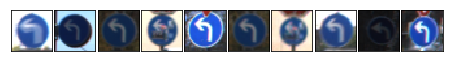

--------------------------------------------------------------------------------------

class 35 Ahead only                                          1080 samples


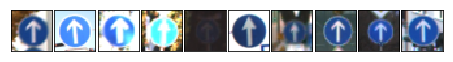

--------------------------------------------------------------------------------------

class 36 Go straight or right                                330 samples


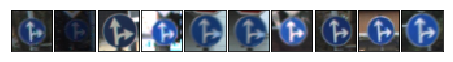

--------------------------------------------------------------------------------------

class 37 Go straight or left                                 180 samples


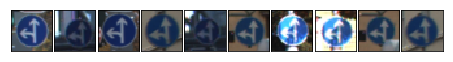

--------------------------------------------------------------------------------------

class 38 Keep right                                          1860 samples


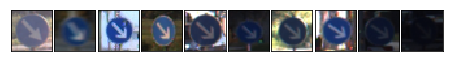

--------------------------------------------------------------------------------------

class 39 Keep left                                           270 samples


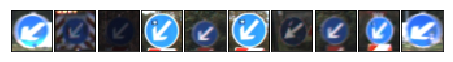

--------------------------------------------------------------------------------------

class 40 Roundabout mandatory                                300 samples


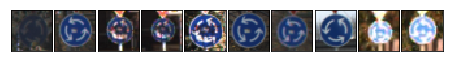

--------------------------------------------------------------------------------------

class 41 End of no passing                                   210 samples


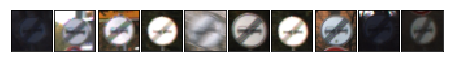

--------------------------------------------------------------------------------------

class 42 End of no passing by vehicles over 3.5 metric tons  210 samples


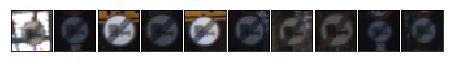

--------------------------------------------------------------------------------------



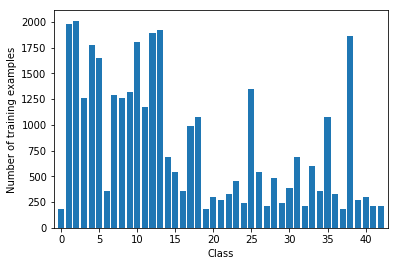

In [4]:
import random

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("class %i %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")
    
plt.bar( np.arange( 43 ), class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

In [5]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 12
SEED = 9559
random.seed(SEED)

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    conv1_d = 32
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, conv1_d), mean = mu, stddev = sigma, seed=SEED))
    conv1_b = tf.Variable(tf.zeros(conv1_d))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2_d = 64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, conv1_d, conv2_d), mean = mu, stddev = sigma, seed=SEED))
    conv2_b = tf.Variable(tf.zeros(conv2_d))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b    
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    fc0   = flatten(conv2)
    
    fc1_d = 160
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*conv2_d, fc1_d), mean = mu, stddev = sigma, seed=SEED))
    fc1_b = tf.Variable(tf.zeros(fc1_d))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    #fc2_d = 84
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=(fc1_d, fc2_d), mean = mu, stddev = sigma, seed=SEED))
    #fc2_b  = tf.Variable(tf.zeros(fc2_d))
    #fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    #fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(fc1_d, n_classes), mean = mu, stddev = sigma, seed=SEED))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc1, fc3_W) + fc3_b
    
    return logits, conv1, conv2


x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="input_images")
y = tf.placeholder(tf.uint8, (None), name="input_labels")

#x_aug = tf.image.rgb_to_grayscale(x)
x_aug = x/255.
x_aug = tf.image.rgb_to_hsv(x_aug)
x_aug = tf.map_fn(lambda img: tf.image.per_image_standardization(img), x, name="whitening")

one_hot_y = tf.one_hot(y, n_classes)

In [6]:
rate = 0.001

logits, d1, d2 = LeNet(x_aug)
predictions = tf.argmax(logits, 1, name="argmax")
top5 = tf.nn.top_k(logits, 5)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        loss = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, _loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
            loss = _loss
            
        print ("loss: ", loss)
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

loss:  0.072782
EPOCH 1 ...
Validation Accuracy = 0.911

loss:  0.00114449
EPOCH 2 ...
Validation Accuracy = 0.933

loss:  0.00751466
EPOCH 3 ...
Validation Accuracy = 0.921

loss:  2.06648e-05
EPOCH 4 ...
Validation Accuracy = 0.882

loss:  1.88231e-05
EPOCH 5 ...
Validation Accuracy = 0.941

loss:  0.0
EPOCH 6 ...
Validation Accuracy = 0.923

loss:  0.00100144
EPOCH 7 ...
Validation Accuracy = 0.934

loss:  7.58604e-08
EPOCH 8 ...
Validation Accuracy = 0.946

loss:  1.13242e-05
EPOCH 9 ...
Validation Accuracy = 0.935

loss:  6.50232e-08
EPOCH 10 ...
Validation Accuracy = 0.954

loss:  1.08372e-08
EPOCH 11 ...
Validation Accuracy = 0.947

loss:  7.94074e-05
EPOCH 12 ...
Validation Accuracy = 0.948

loss:  0.0
EPOCH 13 ...
Validation Accuracy = 0.952

loss:  0.0
EPOCH 14 ...
Validation Accuracy = 0.938

loss:  1.67672
EPOCH 15 ...
Validation Accuracy = 0.955

loss:  0.0
EPOCH 16 ...
Validation Accuracy = 0.941

loss:  0.0
EPOCH 17 ...
Validation Accuracy = 0.957

loss:  9.

In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [10]:
from skimage import io, transform
import os

X_custom = np.empty([0, 32, 32, 3], dtype = np.int32)

for i in range(5):
    image = io.imread(os.getcwd() + "/examples/test_{0:0>2}".format(i + 1) + '.jpg')
    image = transform.resize(image, [32, 32, 3])
    X_custom = np.append(X_custom, [image[:, :, :3]], axis = 0)

### Predict the Sign Type for Each Image

In [11]:
test2_pred = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test2_pred = sess.run(predictions, feed_dict={x: X_custom})

names = list(map_names(test2_pred))

In [12]:
print (names)

['Stop', 'Speed limit (60km/h)', 'No entry', 'Speed limit (80km/h)', 'Yield']


### Analyze Performance

In [13]:
b  = test2_pred == [14, 3, 17, 1, 13]
print (np.sum(b)/5.0)

0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [35]:
t = None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    t = sess.run(top5, feed_dict={x: X_custom})
    

[[['Stop' '1.0']
  ['Speed limit (30km/h)' '3.9417757889898654e-38']
  ['Speed limit (20km/h)' '0.0']
  ['Speed limit (50km/h)' '0.0']
  ['Speed limit (60km/h)' '0.0']]

 [['Speed limit (60km/h)' '0.9978376030921936']
  ['Speed limit (80km/h)' '0.002162455813959241']
  ['End of speed limit (80km/h)' '1.3976219699638393e-30']
  ['Speed limit (20km/h)' '0.0']
  ['Speed limit (30km/h)' '0.0']]

 [['No entry' '1.0']
  ['Speed limit (20km/h)' '0.0']
  ['Speed limit (30km/h)' '0.0']
  ['Speed limit (50km/h)' '0.0']
  ['Speed limit (60km/h)' '0.0']]

 [['Speed limit (80km/h)' '1.0']
  ['Go straight or right' '1.385089050837423e-36']
  ['Speed limit (20km/h)' '0.0']
  ['Speed limit (30km/h)' '0.0']
  ['Speed limit (50km/h)' '0.0']]

 [['Yield' '1.0']
  ['Speed limit (20km/h)' '0.0']
  ['Speed limit (30km/h)' '0.0']
  ['Speed limit (50km/h)' '0.0']
  ['Speed limit (60km/h)' '0.0']]]


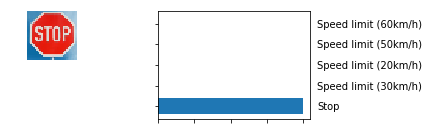

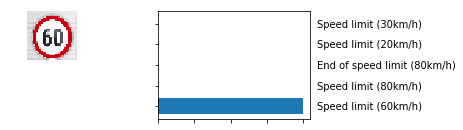

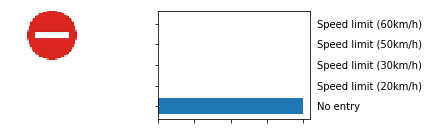

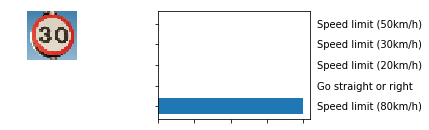

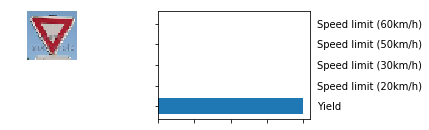

In [36]:
import matplotlib.gridspec as gridspec

def plot_image_statistics(predictions, index):
    """
    Plots prediction statistics for a single example.

    Parameters
    ----------
    predictions   : 
                    Array of predictions.
    index         : 
                    Index of the example we need to plot statistics for
    """    
    # Prepare the grid
    plt.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    plt.imshow(X_custom[index])
    plt.axis('off')

    # Plot predictions
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.barh(np.arange(5)+.5, predictions[0][index], align='center')
    plt.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    plt.show()

    
print (np.dstack((np.vectorize(map_names)(t[1]), t[0])))

for i in range(5):
    plot_image_statistics(t, i)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [16]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = sess.run(tf_activation, feed_dict={x : image_input}) #tf_activation.eval(session=sess, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

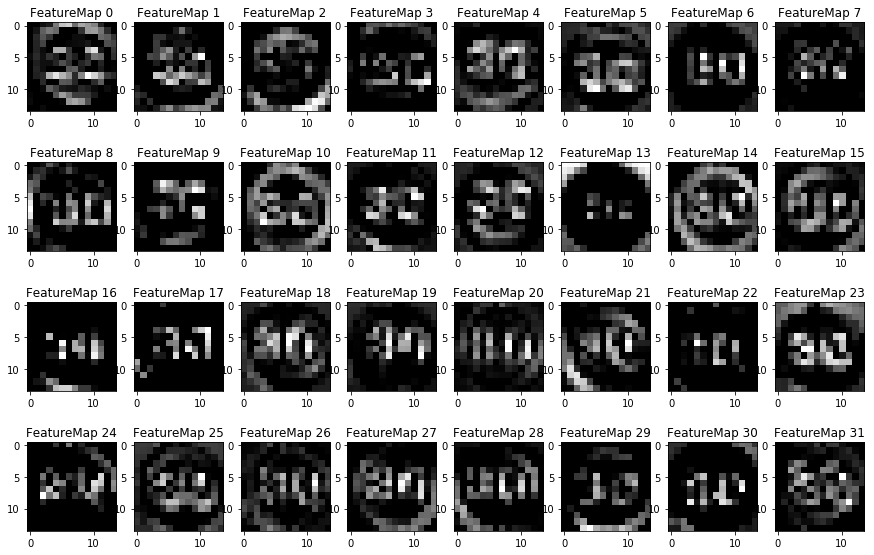

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(np.expand_dims(X_custom[3],0), d1)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

in fact it is not very interesting, I'm pretty sceptical on CNNs. as this method has huge drawbacks like:

* need big amount of labeled data and artifitial augmentation
* there is no optimization or debug methods. At this point it is not a science it is a magic
* current layer types are not very effictient for computer vision tasks as they lose information about rotation, translation and scale



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 